[1 1 1 1 0 0 0 0 0 2 2 2 2 2]


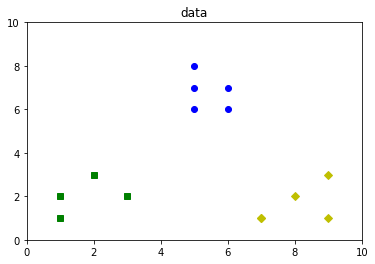

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3]) 

x = np.c_[x1, x2] 

#모델 선택
kmeans = KMeans(n_clusters = 3)

#학습
kmeans_model = kmeans.fit(x)
print(kmeans_model.labels_)

#시각화
colors = ['b','g','y']
markers = ['o','s','D']

#mfc = marketfacecolor
#mew = 마커 선 굵기 markeredgewidth
#mec = 마커의 선색깔 markeredgecolor
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i],x2[i],color = colors[l], marker = markers[l], ls = 'None')
    
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('data')

plt.show()

클러스터링 : 클래스 분류 방법 중 정답 레이블이 없는 클래스를 분류(실행 속도가 빠르고 확장성)
             복수의 샘플 데이터가 많은 경우, 패턴이 모호한 경우 등에 적용한다.
             ex) 고객 세분화, 유전자 분류
            
k-means : 정답 레이블이 있는 데이터를 분류
          K - 클러스터 수를 나타내며 반드시 데이터 수보다 작은 값으로 지정(클래스 수 < 데이터 개수)
          
    [step 01] 표본공간 k 개의 중심을 무작위로 생성하기
    [step 02] 각 표본을 가장 가까운 중심에 할당
    [step 03] 각 군집의 중심을 새롭게 하기
    # 데이터를 패턴을 이용해서 나누어 묶자. K-means (K 평균 군집화 알고리즘) 을 이용해서
    
ex01) 데이터를 패턴을 이용해서 나누어 묶자. K-means (K 평균 군집화 알고리즘) 을 이용해서
선수들의 체력과 드리블 능력을 상, 중, 하 3개의 팀으로 분류하자.

In [15]:
import pandas as pd

#step 1 : 데이터 로드 : 원본에서 Overall(능력치)를 기준으로 내림차순하자. 200명만 복사
data = pd.read_csv('fifa2019.csv')
df = pd.DataFrame.copy(data.sort_values(by = 'Overall', ascending =False).head(200))

#step 2 : 원하는 컬럼을 추출해서 학습데이터를 준비하자.

#2-1 이름, 체력, 드리블, 짧은 패스, 패널티킥의 리스트를 만들자.
test_features = ['Name', 'Stamina', 'Dribbling', 'ShortPassing', 'Penalties']

#2-2 df, test_features로 test_df로 프레임을 생성하자.
test_df = pd.DataFrame(df, columns = test_features)
test_df.head(5)

#2-3 test_df 데이터 프레임을 이용해서 XY로 넘파이 배열
XY = np.array(test_df)

#출력 확인
#print(XY)

# X (선수정보) : XY에 배열에 속한 선수들의 체력(1번열) 드리블... 값[1:3]을 생성해서 X로 대입
X = XY[:,1:3]
print(X)
print(len(X))

[[72.0 97.0]
 [88.0 88.0]
 [81.0 96.0]
 [43.0 18.0]
 [90.0 86.0]
 [83.0 95.0]
 [89.0 90.0]
 [90.0 87.0]
 [84.0 63.0]
 [66.0 53.0]
 [78.0 89.0]
 [41.0 12.0]
 [75.0 81.0]
 [78.0 85.0]
 [86.0 80.0]
 [65.0 58.0]
 [76.0 89.0]
 [43.0 30.0]
 [92.0 80.0]
 [89.0 80.0]
 [38.0 13.0]
 [35.0 17.0]
 [83.0 88.0]
 [80.0 92.0]
 [96.0 79.0]
 [66.0 68.0]
 [39.0 26.0]
 [41.0 12.0]
 [74.0 62.0]
 [70.0 84.0]
 [41.0 10.0]
 [75.0 87.0]
 [91.0 90.0]
 [79.0 91.0]
 [76.0 79.0]
 [92.0 84.0]
 [70.0 94.0]
 [75.0 90.0]
 [70.0 85.0]
 [87.0 69.0]
 [84.0 89.0]
 [83.0 90.0]
 [80.0 83.0]
 [65.0 59.0]
 [84.0 84.0]
 [84.0 86.0]
 [75.0 71.0]
 [75.0 91.0]
 [91.0 80.0]
 [84.0 80.0]
 [39.0 16.0]
 [88.0 87.0]
 [71.0 66.0]
 [72.0 77.0]
 [78.0 69.0]
 [75.0 90.0]
 [55.0 90.0]
 [79.0 77.0]
 [69.0 84.0]
 [69.0 64.0]
 [78.0 86.0]
 [74.0 62.0]
 [71.0 69.0]
 [87.0 69.0]
 [73.0 87.0]
 [87.0 75.0]
 [41.0 23.0]
 [92.0 80.0]
 [77.0 90.0]
 [73.0 57.0]
 [90.0 87.0]
 [78.0 88.0]
 [71.0 70.0]
 [84.0 87.0]
 [78.0 92.0]
 [79.0 88.0]
 [78.0 92.0]

C_x array :  [78.0 72.0 91.0]
C_y array :  [69.0 87.0 10.0]


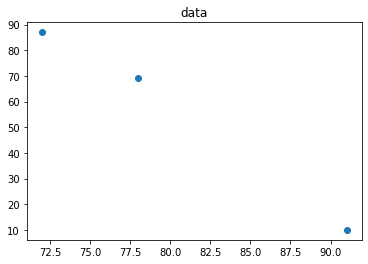

In [17]:
#step 3 : k-평균 군집화  알고리즘 적용
#3-1 표본공간 k 개의 중심을 무작위로 생성하기
#X 배열 [체력 드리블] -> 무작위로 3개를 뽑아서 2차원 배열 -> C[체력무작위 3, 드리블 무작위 3]를 생성하자.
k = 3 # 분류하는 군집의 개수(k) 3

#C_x : X배열에서 체력데이터(0)를 무작위로 3개만 추출해서 1차원 배열로 생성 np.random..choice(대상, 개수)
C_x = np.random.choice(X[:,0],3)
print("C_x array : ", C_x)

#C_y : X배열에서 드리블데이터(1)를 무작위로 3개만 추출해서 1차원 배열로 생성 np.random..choice(대상, 개수)
C_y = np.random.choice(X[:,1],3)
print("C_y array : ", C_y)

#Res 라는 임의 변수를 생성해서 C_x, C_y 로 묶자
Res = list(zip(C_x,C_y))

#C라는 중심점 배열을 생성
C = np.array(list(zip(C_x,C_y)))

#확인_View
Stamina = test_df['Stamina']
Dribbling = test_df['Dribbling']

plt.title('data')
plt.scatter(C_x, C_y)
plt.show() 

In [5]:
#[3-2] 각 표본을 가장 가까운 중심에 할당
# 거리를 추측하는 함수 유클리디안 거리 계산 함수
def Distance(A,B):
    return np.sqrt(np.sum(np.power((A-B),2)))

X(선수정보) : 축구선수 체력(1열), 드리블(2열)
C 배열 : 현재 중심 위치값
temp = Distance(X[i],C[i])
           - C[i] 군집중심과 선수 데이터 X[i]간의 거리를 계산한 결과를 리턴
           - distance.append(temp)
           
Clusters배열
           - 입력값과 각 중심값 사이의 거리 중 가장 짧은 거리의 인덱스 저장
           

#[3-3] 각 군집의 중심 C을 새롭게 하기
  - points 리스트 : 군집의 중심값 별로 데이터를 모아서 points 리스트에 저장함
  - C 배열 : points 값의 평균을 구해서 업데이트한 중심 위치값
  - C_old : 이전 중심값
  - flag : C, C_old의 유클리드 거리를 구한값

In [6]:
#step 3-3
# 현재 중심위치값과 이전 중심 위치값의 거리 구하기
# c_old 배열 만들기
C_old = np.zeros(C.shape)

#클러스트 배열(입력값과 각 중심값 사이의 거리 중 가장 짧은 거리의 인덱스 저장)
clusters = np.zeros(len(X))

# C배열(체력과 드리블 3*2), C_old(초기값으로 채운 배열)
flag = Distance(C, C_old)
print("C_old :\n", C_old)
print("C : \n", C)
print("flag : \n", flag)

C_old :
 [[0. 0.]
 [0. 0.]
 [0. 0.]]
C : 
 [[65. 83.]
 [34. 80.]
 [41. 83.]]
flag : 
 165.04544828622207


In [18]:
from copy import deepcopy
distances = []  #군집 중심과 데이터간의 거리계산 결과를 저장

#군집 중심의 좌표가 변화가 없을 때까지 while를 루프를 통해 반복 실행
while flag != 0:
    #for문을 이용해서 선수들 각각 체력, 드리블 값과 임의의 군집중심의 값의 거리
    for i in range(len(X)): # 선수 데이터
        for j in range(3): #중심 위치(C) - 3개
            temp = Distance(X[i],C[j])
            distances.append(temp)
            
        #distances 있는 최소값을 가진 인덱스 번호를 저장
        cluster = np.argmin(distances)
        clusters[i] = cluster
        distances = []
    
    print("cluster : ", clusters)  #200명의 선수가 순서대로 어떤 군집에 해당되는지 0,1,2숫자로 매칭된다.
    print("==============2단계 끝[각 표본에 가까운 중심 할당==============]")
    #지금 까지 사용된 중심을 C_old에 대입
    C_old = deepcopy(C)
    
    for i in range(k):
        #같은 군집의 중심값 별로 데이터를 모아서 points 리스트에 저장
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        print("i : ",i,"points : ", points)
        #points의 평균값을 계산해서 C[i]에 대입
        C[i] = np.mean(points)
        
    #새롭게 계산된 군집의 중심(C) 와 이전의 중심 간의 거리차를 계산 flag :C, C_old의 유클리드 거리를 구한값
    
    flag = Distance(C, C_old)
    print("========3단계 끝 : 각 군집의 중심을 새롭게")
            

cluster :  [1. 1. 1. 2. 1. 1. 1. 1. 0. 0. 1. 2. 1. 1. 0. 0. 1. 2. 0. 0. 2. 2. 1. 1.
 0. 0. 2. 2. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 2. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 2. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 2. 2. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 2. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 2. 0. 2. 0. 1. 0. 1. 1. 2. 1. 2. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 2. 2. 1. 1. 0. 1. 1. 0. 0. 0. 2. 0. 1. 0. 2. 2. 0. 1.
 0. 1. 0. 2. 0. 0. 2. 0. 2. 1. 1. 1. 0. 2. 0. 0. 2. 2. 2. 1. 0. 0. 2. 1.
 0. 0. 1. 1. 0. 1. 1. 0.]
==============2단계 끝[각 표본에 가까운 중심 할당==============]
i :  0 points :  [array([84.0, 63.0], dtype=object), array([66.0, 53.0], dtype=object), array([86.0, 80.0], dtype=object), array([65.0, 58.0], dtype=object), array([92.0, 80.0], dtype=object), array([89.0, 80.0], dtype=object), array([96.0, 79.0], dtype=object), array([66.0, 68.0], dtype=object), array([74.0, 62.0], dtype=obje

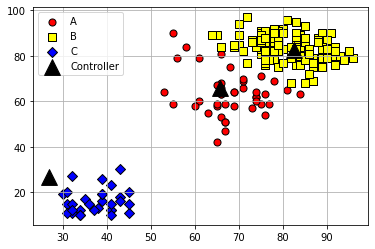

In [19]:
import matplotlib.pyplot as plt
# 군집화 결과를 시각화 하자
#1군집
plt.scatter(X[clusters == 0,0], X[clusters == 0,1], s= 50, c = 'red', marker = 'o', edgecolor = 'black', label = 'A')

#2군집
plt.scatter(X[clusters == 1,0], X[clusters == 1,1], s= 50, c = 'yellow', marker = 's', edgecolor = 'black', label = 'B')

#3군집
plt.scatter(X[clusters == 2,0], X[clusters == 2,1], s= 50, c = 'blue', marker = 'D', edgecolor = 'black', label = 'C')

#중심좌표
plt.scatter(C[:,0], C[:,1], s= 250, c = 'black', marker = '^', edgecolor = 'black', label = 'Controller')

plt.legend()
plt.grid()
plt.show()

k - NN(k-nearest neighbor algorithm)
  - 특징 공간에서 가장 가까운 훈련 예에 따라 분류 방법이며, 패턴 인식에 자주 사용되며 회귀 분석에 사용된다.
  - 분류 및 회귀에 사용하는 알고리즘
  - 연동원리 : n차원에 대한 벡터로 특수 공간을 생성하면 데이터간의 거리가 생긴다.
    
    유클리드공식으로 거리를 계산한다.  분류에서 목적 변수가 알 수 없는 데이터가 있을 경우 그 데이터의 목적변수를
    특수공간에 가장 가까운 다른 데이터의 목적 변수가 많은 곳으로 결정된다.
    
    회귀일 경우에는 알 수 없는 데이터가 있을 경우 그 데이터의 목적변수를 특수공간에 가장 가까운 다른 데이터의
    목적 변수의 평균을 목적 데이터로 결정된다.

In [32]:
#exam02

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_target_data = pd.DataFrame(iris.target, columns = ['Species'])
iris_df.head()
print(iris.target) # 정답라벨

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [33]:
from sklearn.model_selection import train_test_split

#데이터 분철
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_target_data, test_size = 0.25, random_state = 0)

#분류 모델
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, Y_pred))

0.9736842105263158


<ipython-input-33-9c8cb3032155>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)
<ipython-input-27-c3783683c6f8>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

<function matplotlib.pyplot.show(close=None, block=None)>

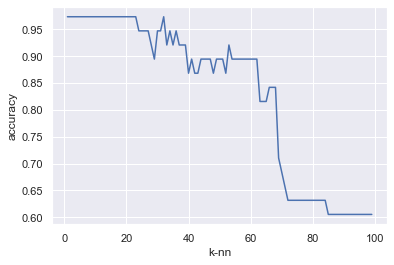

In [27]:
#ex03) 이웃하는 데이터 수를 변경하고 정밀도의 변화를 확인 해보자
import seaborn as sns
accuracy_list = []
sns.set()
k_range = range(1,100)
for k in k_range:
    #분류모델
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    Y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test,Y_pred))
    
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show

In [30]:
#exam04) 회귀를 구현해 보자. K-NN의 알고리즘을 이용
from sklearn.neighbors import *
from sklearn.metrics import *  # mean_squared_error, mean_absolute_error
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data)
X = boston_df
y = boston.target

#학습 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#학습 모델
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
Y_pred = knr.predict(X_test)

mae = mean_absolute_error(y_test, Y_pred)  # 오차값을 구해서 평균 절대 오차값
rmae = np.sqrt(mean_squared_error(y_test,Y_pred))  # 오차값을 구해서 제곱평균, 제곱근의 오차값

print('평균 절대 오차 : ', mae)
print('제곱평균의 제곱근 오차 : ', rmae)

평균 절대 오차 :  4.330551181102361
제곱평균의 제곱근 오차 :  6.632016118442083


<function matplotlib.pyplot.show(close=None, block=None)>

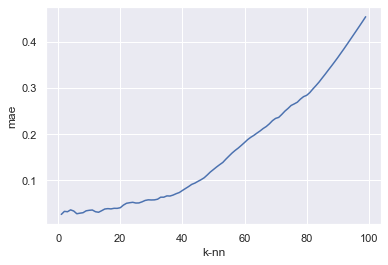

In [37]:
#ex03) 이웃하는 데이터 수를 변경하고 정밀도의 변화를 확인 해보자
import seaborn as sns
mae_list = []
sns.set()
k_range = range(1,100)
for k in k_range:
    #분류모델
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train,y_train)
    Y_pred = knn.predict(X_test)
    mae_list.append(mean_squared_error(y_test,Y_pred))
    
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, mae_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('mae')
plt.show

K-NN : 예측 데이터에 가장 가까운 훈련데이터로 예측하는 방법
특징 :
       1. 알려져있는 범주로 알려지지 않은 범주를 분류하는데 사용
       2. 기존의 범주가 존재
       3. 단 한번의 거리계산으로 값을 예측한다. (n_neighbors의 개수로)
       4. 전처리가 중요하다. (결손치, 이상치)
       5. 특징이 많은 데이터셋은 부적절하다.
       6. Euclidean distance 계산식
       7. 적용분야 : 개인별 영화추천, 이미지/비디오 얼굴과 글자인식, 유전자 데이터 패턴(양성, 음성) 등

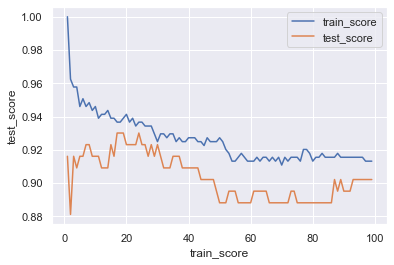

In [44]:
#exam04) sklearn.datasets.load_breast_cancer 로 분류작업을 해보자
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

#데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = cancer.target, random_state = 0)

train_accuracy_list = []
test_accuracy_list = []

k_range = range(1,100)

for k in k_range:
    #분류모델
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    
    train_accuracy_list.append(knn.score(X_train, y_train))  #훈련에 대한 정확도
    test_accuracy_list.append(knn.score(X_test,y_test))      #테스트에 대한 정확도
    
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, train_accuracy_list, label = 'train_score')
ax.plot(k_range, test_accuracy_list, label = 'test_score')
ax.set_xlabel('train_score')
ax.set_ylabel('test_score')
ax.legend()
plt.show()  # 88%~100% -> 정확도가 높다. 6인 지점에서 정확도가 가장 높다. K-NN은 n_neighbors를 조정해서 성능평가

In [45]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [46]:
#데이터 로드
iris = datasets.load_iris()
print("레이블 : \n",iris.feature_names)
print("모양 : \n",iris.data.shape)
print("10개의 데이터 표시 : \n",iris.data[:10,:])

#목적 변수
print("레이블 : \n",iris.target_names)
print("모양 : \n",iris.target.shape)
print("전체 보기 : \n",iris.target)

레이블 : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
모양 : 
 (150, 4)
10개의 데이터 표시 : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
레이블 : 
 ['setosa' 'versicolor' 'virginica']
모양 : 
 (150,)
전체 보기 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


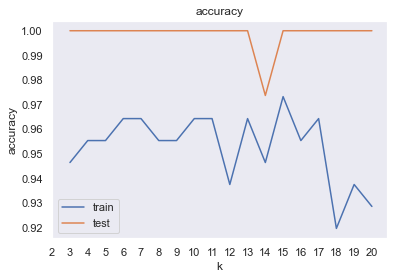

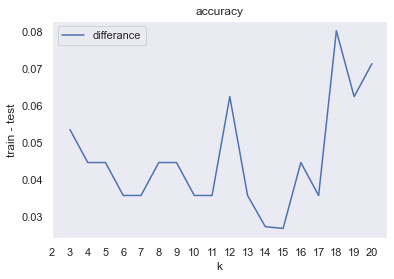

In [49]:
#데이터 세트 분할
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = iris.target, random_state = 0)
y_train.shape

np.unique(y_train, return_counts = True)

#모델링
train_accuracy_list = []
test_accuracy_list = []

k_range = range(3,21)

for k in k_range:
    #분류모델
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    
    train_accuracy_list.append(knn.score(X_train, y_train))  #훈련에 대한 정확도
    test_accuracy_list.append(knn.score(X_test,y_test))      #테스트에 대한 정확도

train_accuracy_list = np.array(train_accuracy_list)
test_accuracy_list = np.array(test_accuracy_list)

plt.figure(figsize = (6,4))

plt.plot(range(3,21),train_accuracy_list,label = 'train')
plt.plot(range(3,21),test_accuracy_list,label = 'test')

#축의 눈금
plt.xticks(np.arange(2,21,1))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.grid()
plt.legend()

plt.figure(figsize = (6,4))

diff = np.abs(train_accuracy_list-test_accuracy_list)
plt.plot(range(3,21),diff,label = 'differance')

#축의 눈금
plt.xticks(np.arange(2,21,1))
plt.xlabel('k')
plt.ylabel('train - test')
plt.title('accuracy')
plt.grid()
plt.legend()

ret :
 0.0
results :
 [[0.]]
neighbours :
 [[1. 0. 0.]]
dist :
 [[ 45. 320. 657.]]


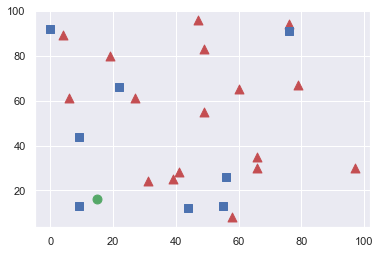

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
train_D = np.random.randint( 0,100,(25,2)).astype(np.float32)
train_D
res_D = np.random.randint( 0,2,(25,1)).astype(np.float32)
res_D
new_D=np.random.randint( 0,100,(1,2)).astype(np.float32)
plt.scatter(new_D[:,0], new_D[:,1],80,'g','o')
red = train_D[res_D.ravel() ==0 ]
plt.scatter(red[:,0], red[:,1],80,'r','^')
blue = train_D[res_D.ravel() ==1 ]
plt.scatter(blue[:,0], blue[:,1],80,'b','s')
knn = cv2.ml.KNearest_create()
knn.train(train_D, cv2.ml.ROW_SAMPLE, res_D)
ret, results, neighbours ,dist = knn.findNearest(new_D, 3)
print("ret :\n", ret)
print("results :\n", results)
print("neighbours :\n", neighbours)
print("dist :\n", dist)
plt.show()
